In [1]:
# =============================================================================
# RESULT ANALYSIS FOR PITMAN-YOR HAWKES PROCESS
# =============================================================================
# This notebook analyzes the results from the Sequential Monte Carlo sampling
# of the Pitman-Yor Hawkes Process model. It examines cluster assignments,
# word distributions, and topic coherence across different clusters.

# Import required libraries for data analysis
import pickle  # For loading serialized particle data
import json    # For loading vocabulary mappings
import numpy as np  # For numerical operations
from collections import Counter  # For counting cluster assignments
from utils import * # Custom utility functions for analysis

In [4]:
# =============================================================================
# LOAD PARTICLE DATA
# =============================================================================
# Load the particles from the SMC sampling results. Each particle contains:
# - Cluster assignments for all documents
# - Word distributions for each cluster
# - Temporal parameters and triggering kernels
# - Log probabilities and weights

with open('results/particles.pkl','rb') as f:
    particles = pickle.load(f)

In [5]:
# =============================================================================
# LOAD VOCABULARY MAPPING
# =============================================================================
# Load the word-to-ID mapping dictionary that was created during preprocessing.
# This allows us to convert word IDs back to actual words for analysis.

with open('data/id2word.json','r') as f:
    id2word = json.load(f)

In [6]:
# =============================================================================
# SELECT REPRESENTATIVE PARTICLE
# =============================================================================
# Since all particles have the same weight (verified), we can select any particle
# for analysis. We'll use the first particle to examine cluster assignments
# and word distributions.

# have verified that all the weights are the same
particle = particles[0]

In [7]:
# =============================================================================
# ANALYZE CLUSTER ASSIGNMENTS
# =============================================================================
# Count how many documents are assigned to each cluster to understand
# the clustering structure and identify dominant topics.

cls_cnt = Counter(particle.docs2cluster_ID)

In [8]:
# =============================================================================
# DISPLAY CLUSTERING STATISTICS
# =============================================================================
# Print basic statistics about the clustering results:
# - Total number of documents processed
# - Total number of clusters discovered

print('document number: %d' % len(particle.docs2cluster_ID) )
print('cluster number: %d' % len(cls_cnt))

document number: 48986
cluster number: 1013


In [9]:
# =============================================================================
# TOP CLUSTERS BY DOCUMENT COUNT
# =============================================================================
# Display the top 10 clusters ranked by number of documents assigned to them.
# This helps identify the most prominent topics discovered by the model.

print('top 10 clusters:')
for cls_id, count in cls_cnt.most_common(20):
    print('cluster %d: %d documents' %( cls_id, count))

top 10 clusters:
cluster 2: 23914 documents
cluster 5: 7997 documents
cluster 20: 4472 documents
cluster 10: 3231 documents
cluster 544: 2462 documents
cluster 493: 1488 documents
cluster 852: 1223 documents
cluster 699: 1174 documents
cluster 466: 810 documents
cluster 899: 113 documents
cluster 357: 99 documents
cluster 937: 88 documents
cluster 435: 55 documents
cluster 922: 53 documents
cluster 194: 49 documents
cluster 500: 43 documents
cluster 955: 34 documents
cluster 3: 29 documents
cluster 340: 28 documents
cluster 536: 25 documents


In [10]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 2 (POLITICS)
# =============================================================================
# Analyze the word distribution for cluster 2, which appears to be the largest cluster.
# This cluster seems to contain political news articles based on the top words:
# trump, president, state, people, government, etc.

# visualize the word distribution of specified cluster:
# for cluster 2 (largest cluster - appears to be political news)
specified_cls = particle.clusters[2]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

white 23542.0
republican 23463.0
democrat 21869.0
administr 20905.0
obama 20631.0
elect 20427.0
compani 20070.0
polici 17203.0
plan 17004.0
parti 16834.0
vote 16616.0
senat 16555.0
law 15976.0
percent 15424.0
women 14960.0
million 14369.0
washington 14188.0
power 13720.0
media 13674.0
busi 13668.0
job 13636.0
chang 13380.0
america 13172.0
leader 12962.0
secur 12883.0
feder 12508.0
order 12400.0
court 12109.0
school 12007.0
execut 11856.0
member 11665.0
citi 11558.0
post 11520.0
talk 11514.0
immigr 11345.0
famili 11156.0
york 11086.0
critic 11033.0
meet 10947.0
deal 10932.0
russia 10823.0
clinton 10766.0
stori 10696.0
interest 10687.0
major 10636.0
rule 10605.0
case 10590.0
tax 10558.0
organ 10489.0
commun 10462.0


Done: saved JSON/CSV and circular word cloud for cluster:  2


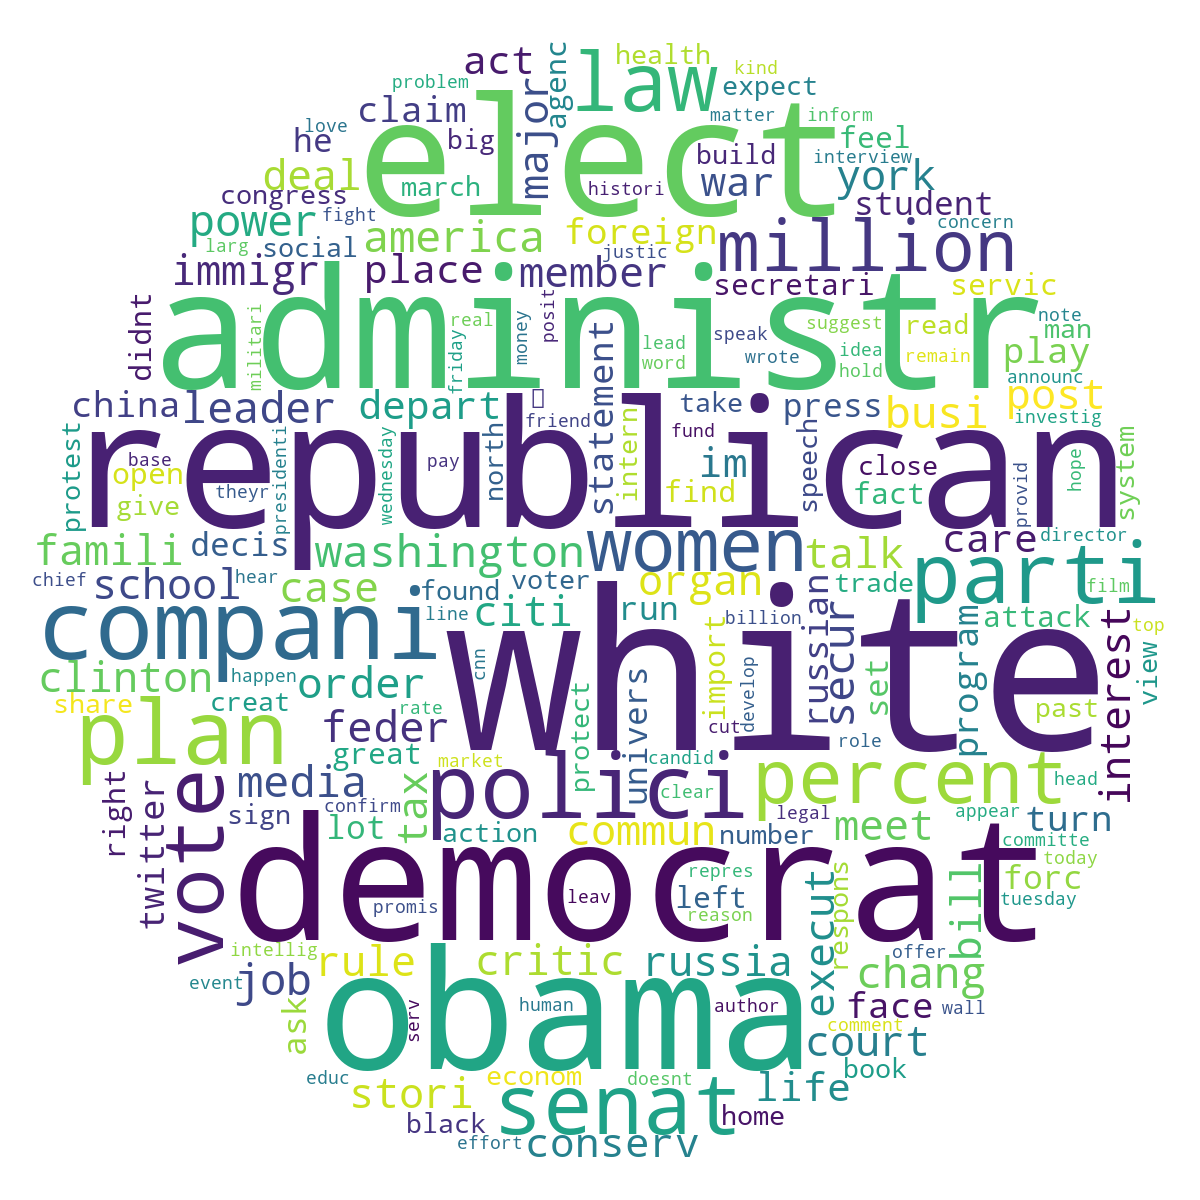

In [11]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 2 # cluster 2
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)

# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [12]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 5 (TECHNOLOGY)
# =============================================================================
# Analyze cluster 5 which appears to contain technology-related articles.
# Top words include: app, wine, car, hotel, smart, data, company, etc.
# This suggests a mix of technology and lifestyle content.

# visualize the word distribution of specified cluster:
# for cluster 5 (appears to be technology/lifestyle related)
specified_cls = particle.clusters[5]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

polic 14511.0
attack 10051.0
court 9385.0
immigr 9219.0
order 8599.0
citi 8350.0
kill 7601.0
law 7216.0
case 7024.0
secur 6621.0
forc 6425.0
famili 6117.0
depart 5952.0
feder 5791.0
investig 5341.0
execut 5169.0
author 4987.0
arrest 4982.0
ban 4981.0
charg 4961.0
administr 4829.0
judg 4805.0
man 4797.0
islam 4685.0
statement 4466.0
member 4388.0
home 4287.0
refuge 4281.0
travel 4239.0
crime 4214.0
death 4213.0
enforc 4179.0
border 4039.0
syria 4013.0
found 3921.0
militari 3838.0
fire 3816.0
prison 3806.0
commun 3788.0
muslim 3771.0
children 3750.0
justic 3685.0
attorney 3596.0
claim 3554.0
victim 3540.0
school 3519.0
crimin 3367.0
friday 3323.0
area 3298.0
face 3284.0


Done: saved JSON/CSV and circular word cloud for cluster:  5


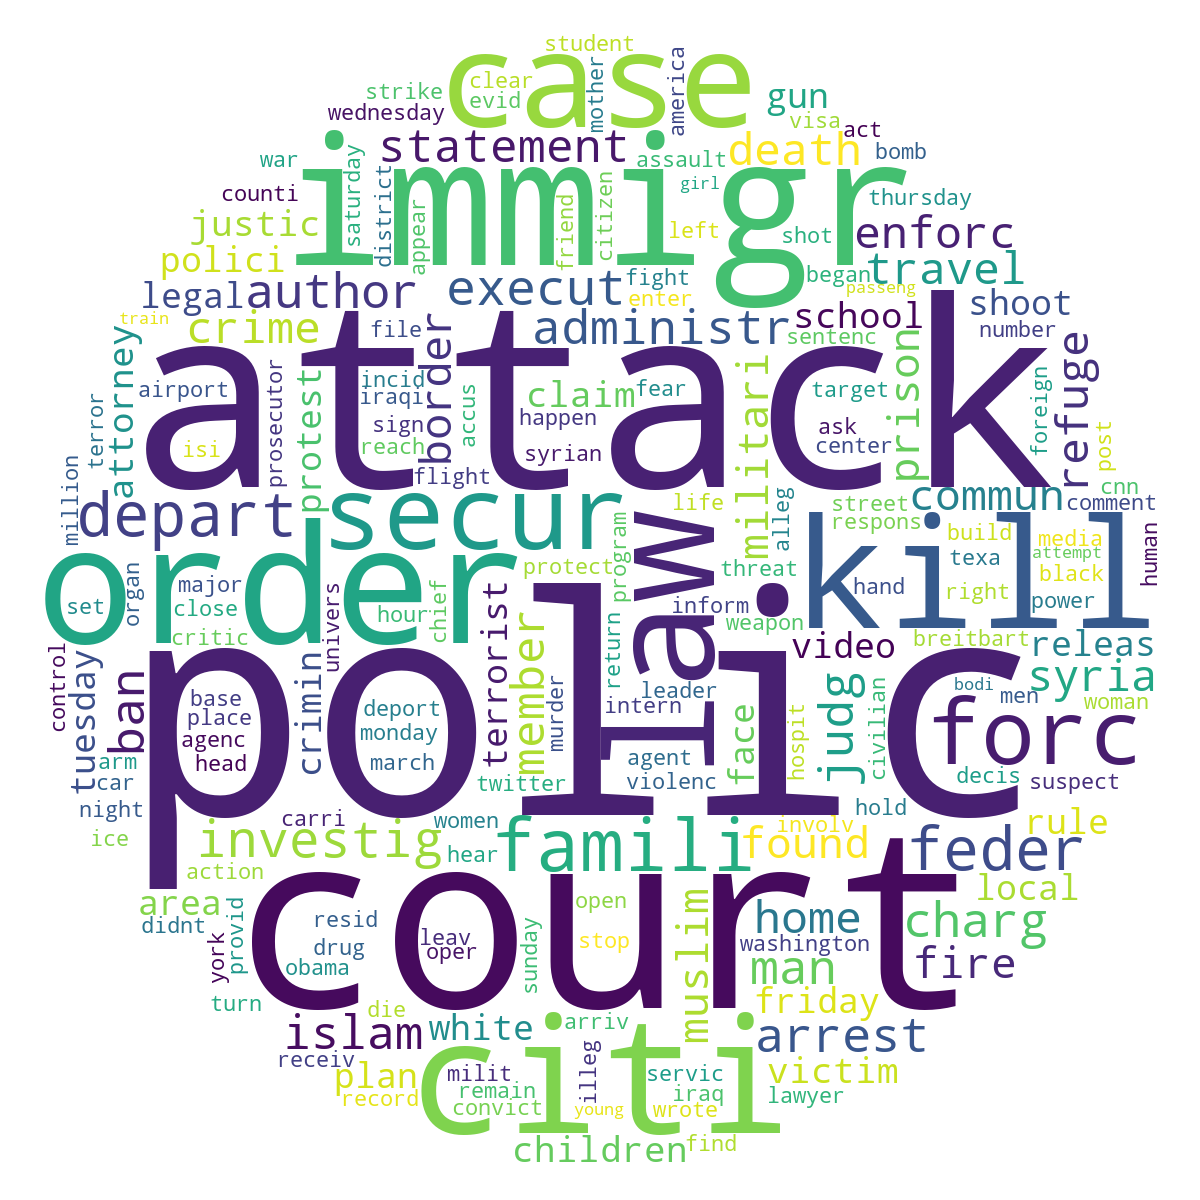

In [13]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 5 # cluster 5
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)



# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [ ]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 20 (SPORTS)
# =============================================================================
# This appears to be a different analysis of cluster 20, showing sports-related content.
# Top words include: playoff, week, team, packer, game, etc.
# This suggests cluster 4 might contain both political and sports content,
# or this might be analyzing a different cluster ID.

# visualize the word distribution of specified cluster:
# for cluster 20 (appears to be sports-related content)
specified_cls = particle.clusters[20]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

studi 5816.0
research 5761.0
health 5251.0
drug 4035.0
found 3842.0
food 3627.0
life 3576.0
univers 3496.0
human 3463.0
famili 3380.0
patient 3375.0
children 3349.0
percent 3346.0
school 3291.0
find 3251.0
home 3191.0
women 3153.0
care 3143.0
medic 3134.0
water 2931.0
compani 2928.0
chang 2798.0
diseas 2771.0
doctor 2752.0
feel 2611.0
lot 2571.0
scienc 2555.0
scientist 2488.0
problem 2428.0
citi 2370.0
develop 2329.0
system 2304.0
test 2291.0
case 2281.0
million 2272.0
effect 2253.0
im 2253.0
place 2217.0
parent 2208.0
program 2207.0
didnt 2188.0
dr 2174.0
high 2074.0
theyr 2059.0
death 2050.0
brain 2045.0
cancer 2028.0
increas 2013.0
hospit 2012.0
risk 2011.0


Done: saved JSON/CSV and circular word cloud for cluster:  20


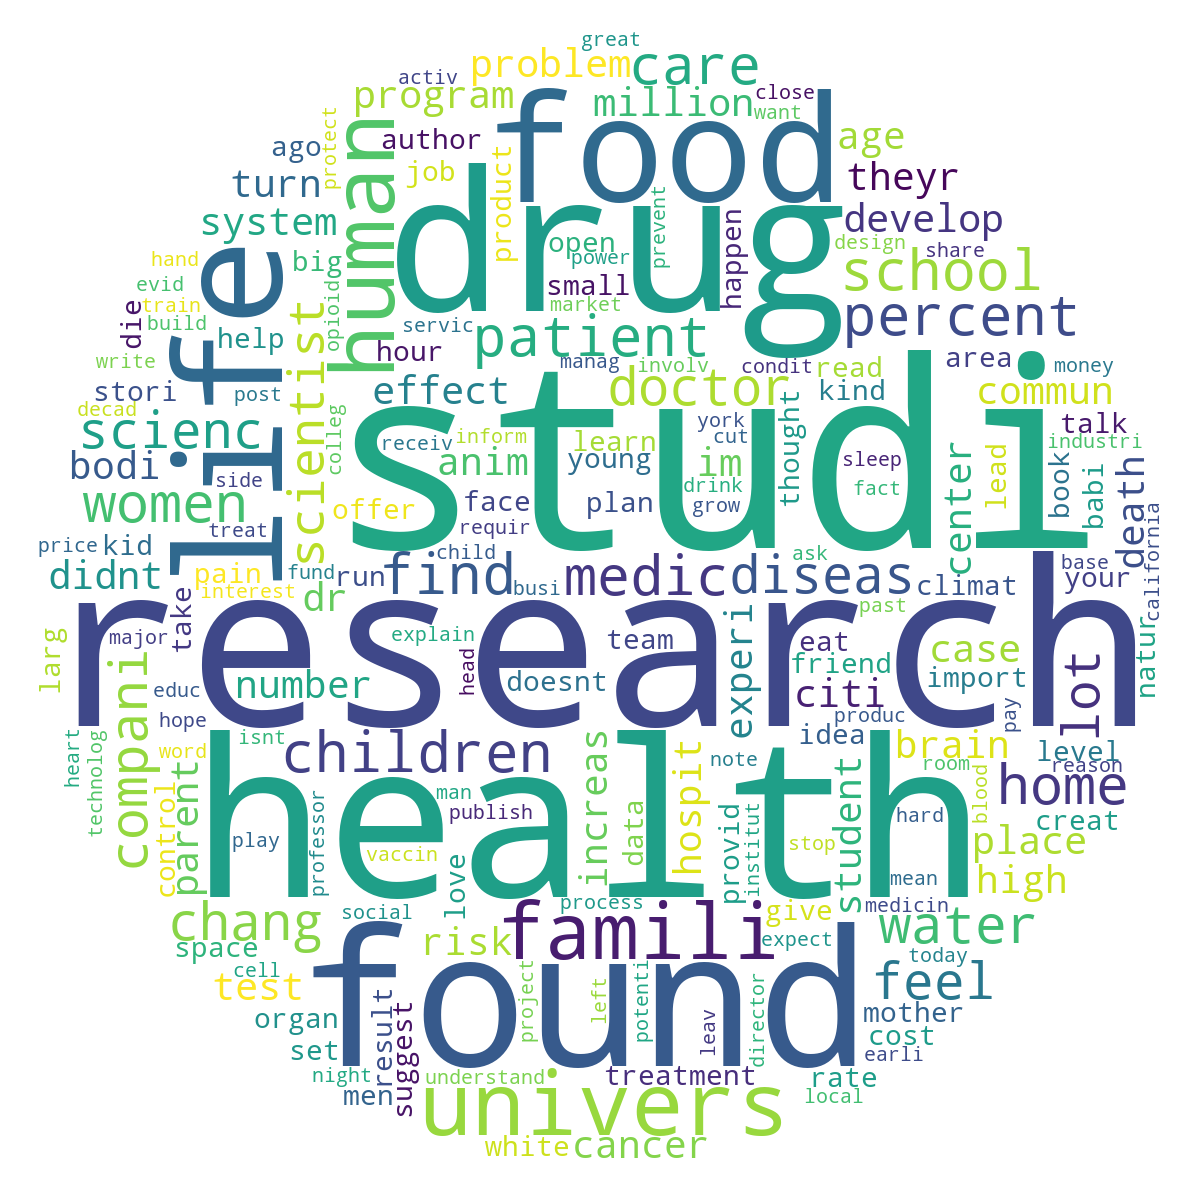

In [14]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 20 # cluster 20
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)

# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [ ]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 10 (LIFESTYLE/ORGANIZATION)
# =============================================================================
# Analyze cluster 10 which appears to contain lifestyle and organization-related content.
# Top words include: organ, drawer, toy, piece, find, cloth, etc.
# This suggests content about home organization, lifestyle tips, and consumer products.

# visualize the word distribution of specified cluster:
# for cluster 28 (appears to be lifestyle/organization related)
specified_cls = particle.clusters[10]
word_distribution = specified_cls.word_distribution
top_num = 100
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

game 7912.0
play 6329.0
team 6293.0
season 4909.0
player 4866.0
win 3136.0
leagu 2786.0
final 2530.0
im 2484.0
he 2454.0
coach 2298.0
fan 2259.0
sport 2251.0
run 2209.0
open 1951.0
hit 1842.0
night 1824.0
feel 1802.0
didnt 1773.0
met 1734.0
guy 1729.0
ball 1716.0
big 1703.0
great 1624.0
yanke 1609.0
lot 1599.0
home 1592.0
left 1503.0
won 1502.0
manag 1496.0
man 1444.0
set 1422.0
score 1399.0
record 1380.0
million 1369.0
turn 1367.0
talk 1357.0
bowl 1355.0
lead 1355.0
love 1353.0
top 1347.0
field 1324.0
star 1322.0
citi 1314.0
career 1312.0
major 1301.0
sunday 1277.0
club 1273.0
pick 1271.0
nfl 1268.0
shot 1265.0
music 1260.0
footbal 1239.0
head 1237.0
super 1225.0
perform 1213.0
minut 1207.0
goal 1206.0
tournament 1167.0
defens 1164.0
watch 1144.0
life 1124.0
return 1123.0
knick 1121.0
round 1120.0
chanc 1106.0
titl 1103.0
match 1099.0
moment 1076.0
miss 1068.0
face 1067.0
pitch 1052.0
seri 1035.0
espn 1035.0
appear 1029.0
ask 1019.0
happen 1013.0
basebal 1010.0
past 1008.0
place 1003.

Done: saved JSON/CSV and circular word cloud for cluster:  10


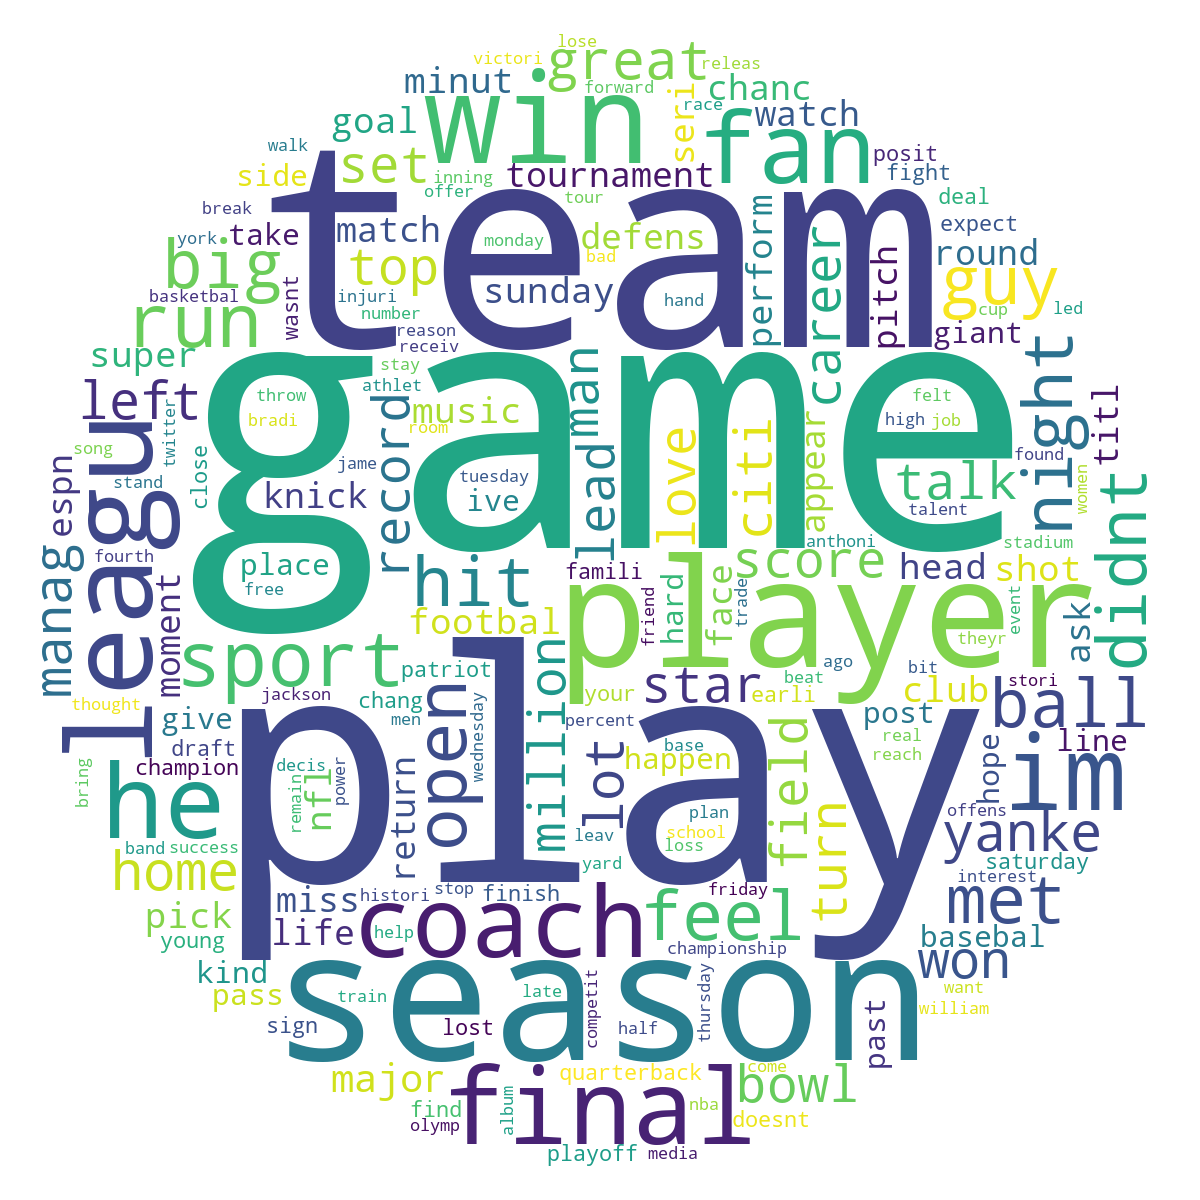

In [15]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 10 # cluster 10
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [ ]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 544 (HEALTH/SCIENCE)
# =============================================================================
# Analyze cluster 544 which appears to contain health and science-related content.
# Top words include: study, research, health, drug, patient, university, etc.
# This cluster clearly focuses on medical research, healthcare, and scientific studies.

# visualize the word distribution of specified cluster:
# for cluster 544 (appears to be health/science related)
specified_cls = particle.clusters[544]
word_distribution = specified_cls.word_distribution
top_num = 100
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

compani 8591.0
percent 5418.0
billion 3682.0
market 3336.0
bank 3273.0
million 2607.0
busi 2527.0
trade 2305.0
share 2245.0
uber 2088.0
investor 2041.0
invest 1989.0
price 1960.0
deal 1930.0
industri 1842.0
financi 1797.0
firm 1745.0
car 1716.0
plan 1715.0
sale 1691.0
expect 1677.0
servic 1676.0
product 1617.0
fund 1610.0
rate 1586.0
manag 1556.0
stock 1540.0
job 1508.0
china 1486.0
execut 1472.0
tax 1454.0
data 1441.0
technolog 1439.0
system 1392.0
economi 1358.0
growth 1317.0
appl 1307.0
wednesday 1305.0
cut 1301.0
global 1284.0
secur 1277.0
custom 1257.0
sourc 1251.0
increas 1238.0
chief 1233.0
consum 1205.0
pay 1190.0
declin 1189.0
offer 1181.0
worker 1178.0
oper 1170.0
feder 1162.0
analyst 1150.0
hold 1134.0
tuesday 1126.0
googl 1120.0
amazon 1120.0
edit 1112.0
target 1111.0
sign 1093.0
major 1082.0
cost 1070.0
capit 1067.0
retail 1066.0
rule 1056.0
sell 1049.0
develop 1045.0
store 1038.0
econom 1035.0
meet 1028.0
close 1026.0
money 1018.0
buy 1017.0
user 1001.0
quarter 997.0
comm

Done: saved JSON/CSV and circular word cloud for cluster:  544


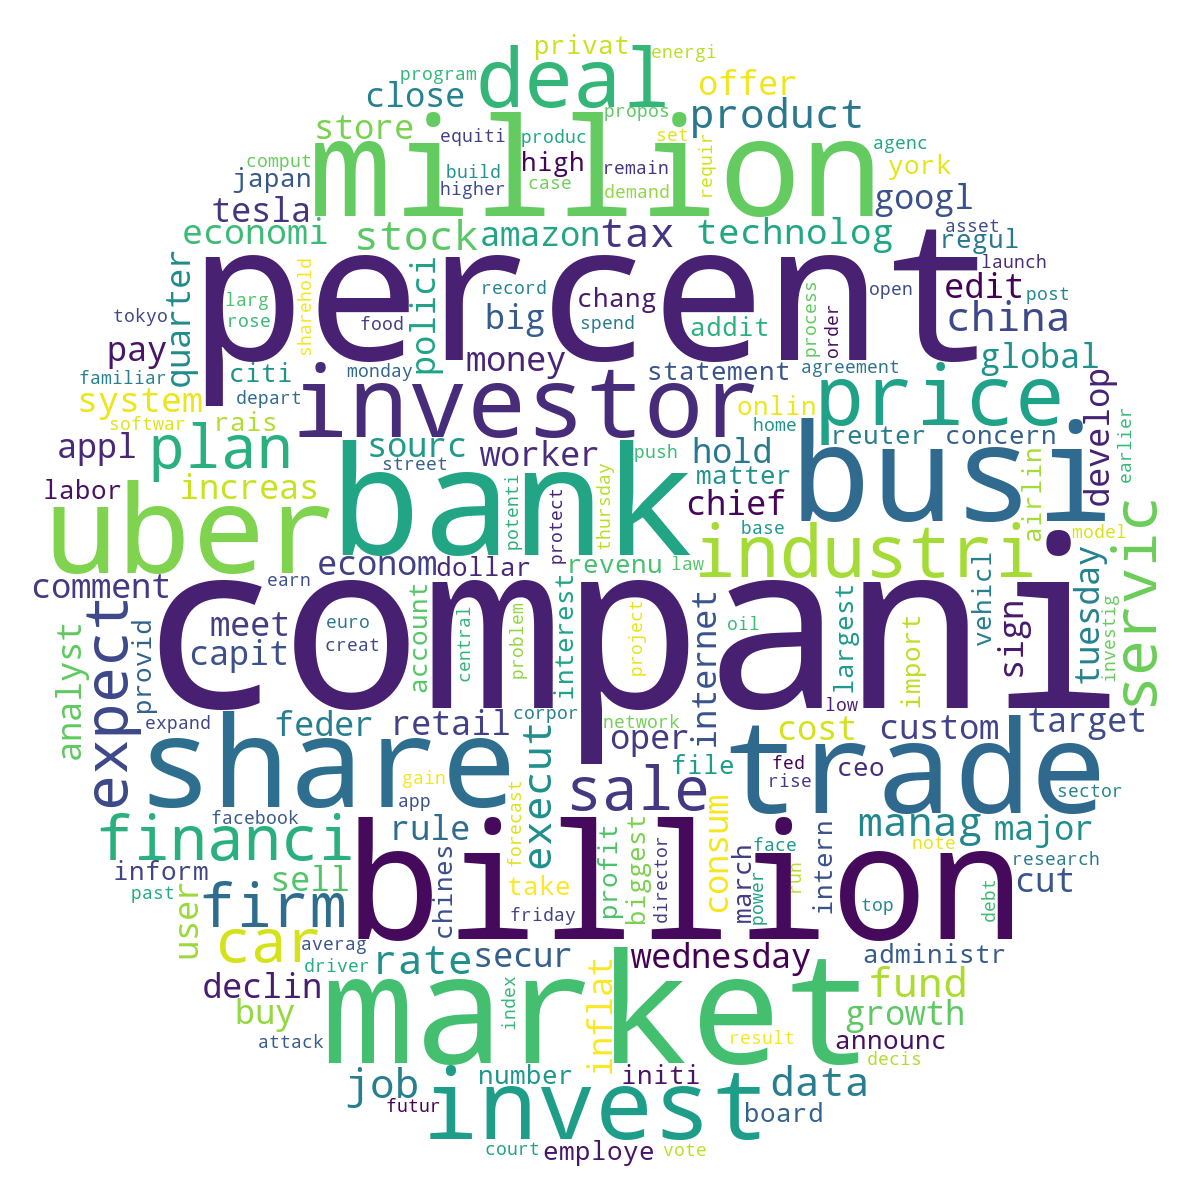

In [16]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 544 # cluster 544
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [25]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 493 (SPORTS)
# =============================================================================
# Analyze cluster 493 which appears to contain sports-related content.
# Top words include: game, team, play, player, season, win, league, etc.
# This cluster is clearly focused on sports coverage, including various leagues
# and athletic competitions.

# visualize the word distribution of specified cluster:
# for cluster 493 (appears to be sports related)
specified_cls = particle.clusters[493]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

republican 9005.0
bill 7215.0
health 6423.0
care 5429.0
democrat 4852.0
plan 4600.0
tax 4485.0
insur 4439.0
obamacar 4176.0
vote 4009.0
senat 3996.0
ryan 2570.0
medicaid 2338.0
legisl 2335.0
conserv 2268.0
repeal 2216.0
gop 2151.0
pass 2115.0
act 2098.0
white 2041.0
percent 2035.0
coverag 1960.0
member 1931.0
parti 1929.0
congress 1783.0
budget 1770.0
fund 1754.0
major 1724.0
law 1680.0
cut 1666.0
cost 1666.0
leader 1644.0
caucu 1619.0
afford 1616.0
replac 1520.0
million 1510.0
freedom 1506.0
feder 1504.0
administr 1503.0
spend 1484.0
polici 1385.0
program 1332.0
propos 1313.0
pay 1260.0
reform 1239.0
premium 1223.0
paul 1168.0
congression 1151.0
requir 1127.0
elect 1108.0


Done: saved JSON/CSV and circular word cloud for cluster:  493


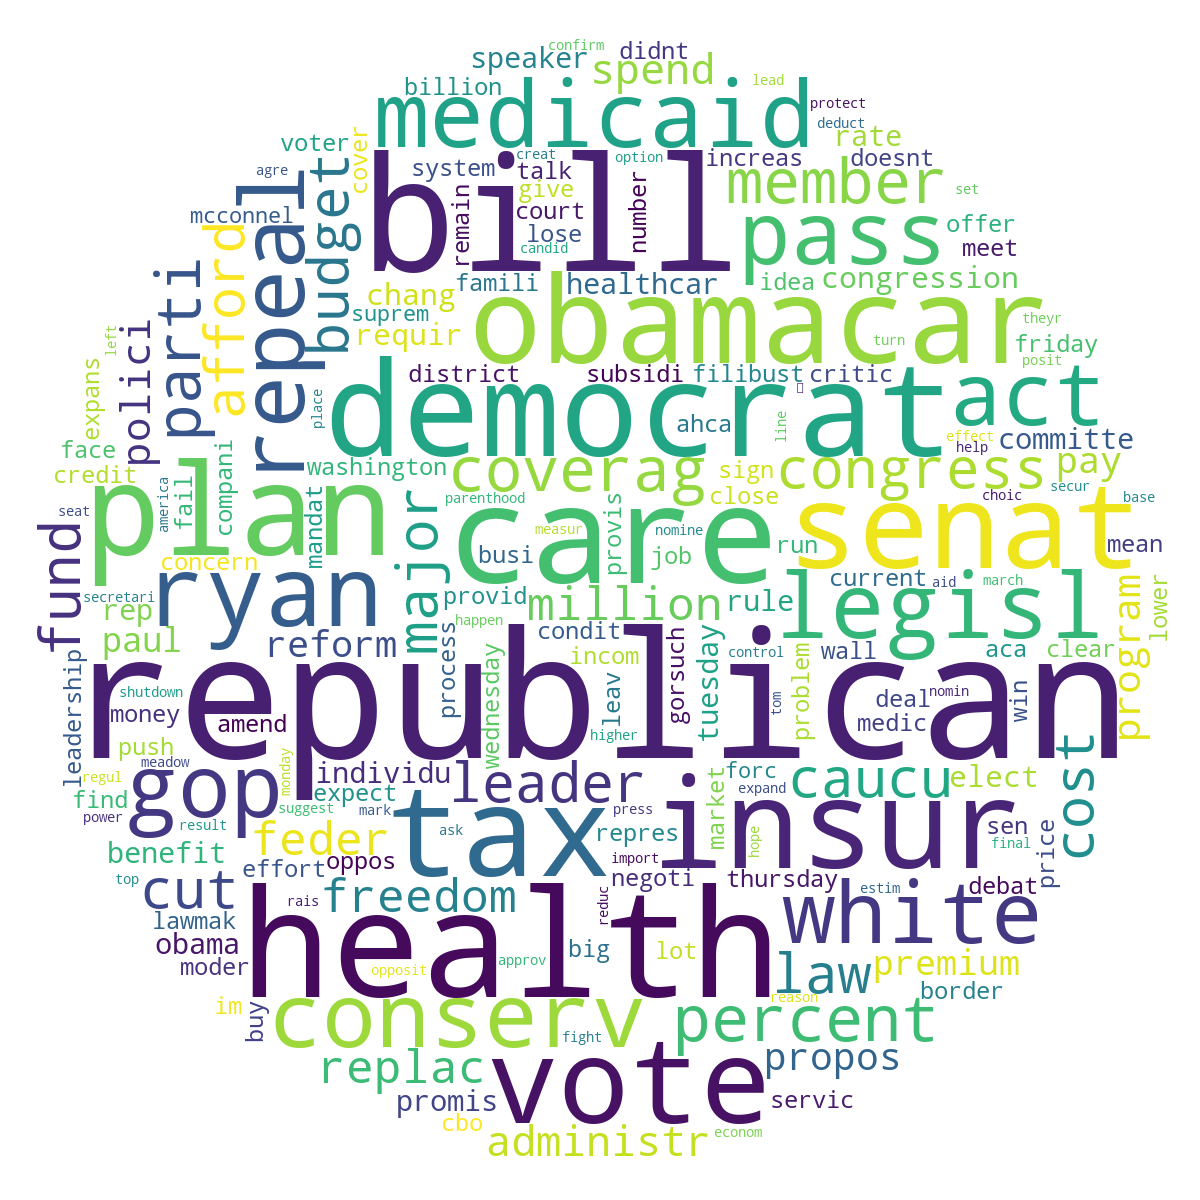

In [17]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 493 # cluster 493
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [27]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 852 (HEALTHCARE POLICY)
# =============================================================================
# Analyze cluster 852 which appears to contain healthcare policy and political content.
# Top words include: republican, bill, health, care, insurance, plan, tax, etc.
# This cluster focuses on healthcare legislation, political debates around
# healthcare reform, and policy discussions.

# visualize the word distribution of specified cluster:
# for cluster 852 (appears to be healthcare policy related)
specified_cls = particle.clusters[852]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

comey 8083.0
investig 6216.0
fbi 4278.0
russia 3359.0
russian 3125.0
director 2877.0
fire 2805.0
white 2748.0
senat 2309.0
intellig 2231.0
committe 2102.0
flynn 2075.0
elect 1947.0
attorney 1889.0
justic 1804.0
democrat 1714.0
inform 1533.0
depart 1462.0
republican 1441.0
session 1396.0
clinton 1374.0
secur 1366.0
meet 1366.0
mueller 1366.0
special 1351.0
administr 1301.0
ask 1294.0
jame 1282.0
counsel 1252.0
convers 1174.0
advis 1040.0
rosenstein 1035.0
washington 1027.0
probe 1005.0
testimoni 989.0
post 969.0
decis 957.0
statement 944.0
press 923.0
leak 916.0
law 910.0
email 862.0
cnn 861.0
hear 860.0
congress 822.0
	 819.0
sourc 815.0
deputi 813.0
stori 805.0
tuesday 802.0


Done: saved JSON/CSV and circular word cloud for cluster:  852


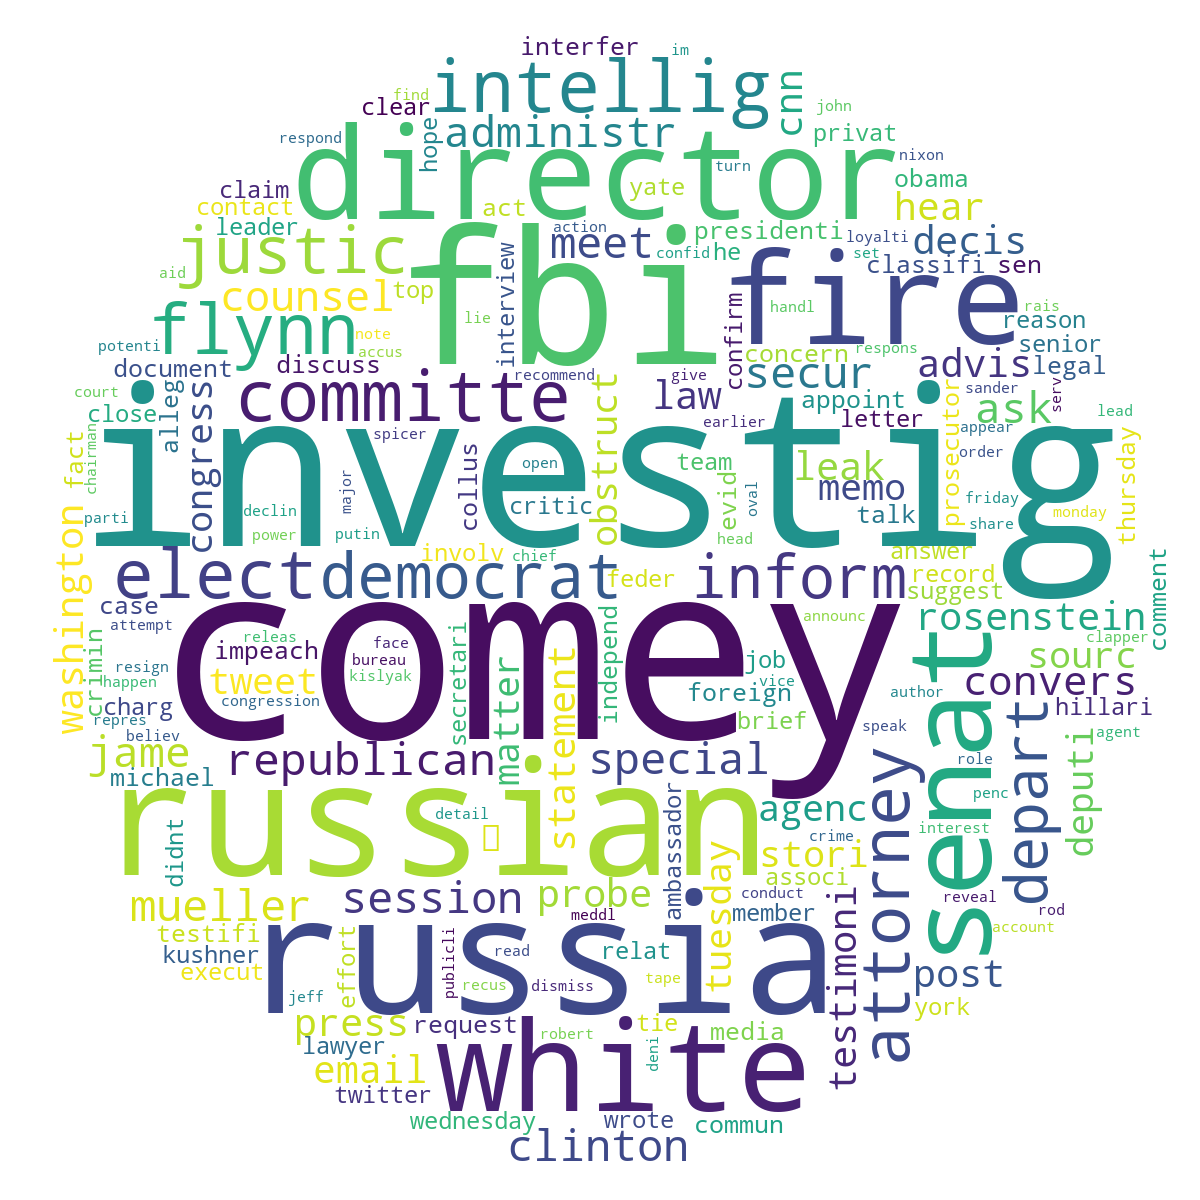

In [18]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 852 # cluster 852
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [29]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 699 (RUSSIA INVESTIGATION)
# =============================================================================
# Analyze cluster 699 which appears to contain content about the Russia investigation.
# Top words include: comey, investigation, fbi, russia, russian, director, etc.
# This cluster focuses on political investigations, FBI activities, and
# related legal and political developments.

# visualize the word distribution of specified cluster:
# for cluster 669906 (appears to be Russia investigation related)
specified_cls = particle.clusters[699]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

north 5286.0
korea 4845.0
missil 2655.0
militari 2456.0
syria 2299.0
nuclear 2079.0
forc 2010.0
china 1948.0
attack 1877.0
administr 1861.0
weapon 1849.0
korean 1823.0
russia 1795.0
war 1685.0
strike 1555.0
iran 1549.0
south 1463.0
assad 1433.0
syrian 1385.0
secur 1315.0
leader 1302.0
saudi 1289.0
test 1199.0
polici 1185.0
chemic 1162.0
foreign 1158.0
washington 1132.0
defens 1130.0
russian 1125.0
region 1115.0
alli 1111.0
qatar 1111.0
tillerson 1110.0
obama 1109.0
regim 1043.0
deal 1010.0
white 975.0
power 972.0
meet 966.0
action 950.0
kim 943.0
secretari 913.0
launch 901.0
statement 897.0
islam 887.0
intern 858.0
pyongyang 853.0
arabia 838.0
sanction 788.0
	 765.0


Done: saved JSON/CSV and circular word cloud for cluster:  699


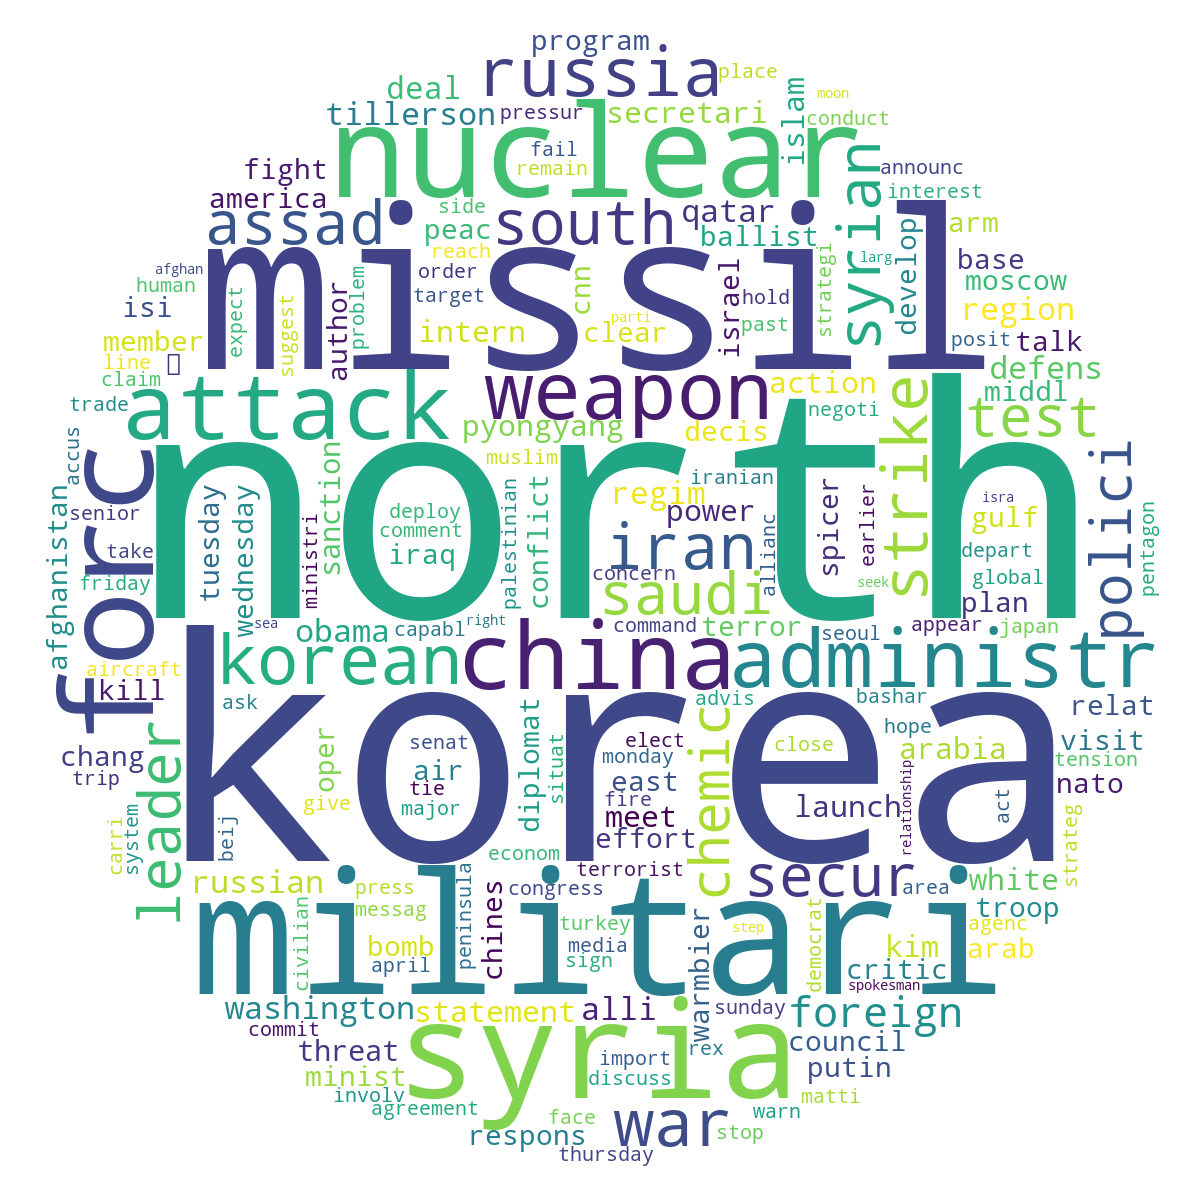

In [19]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 699 # cluster 699
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [ ]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 466 (NORTH KOREA)
# =============================================================================
# Analyze cluster 466 which appears to contain content about North Korea.
# Top words include: north, korea, missile, china, korean, nuclear, etc.
# This cluster focuses on international relations, military developments,
# and geopolitical issues related to North Korea.

# visualize the word distribution of specified cluster:
# for cluster 466 (appears to be North Korea related)
specified_cls = particle.clusters[466]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

intellig 3212.0
investig 3108.0
russian 3006.0
committe 2434.0
russia 2251.0
white 2119.0
obama 1991.0
nune 1881.0
elect 1606.0
inform 1506.0
democrat 1481.0
administr 1379.0
session 1320.0
claim 1221.0
senat 1197.0
wiretap 1159.0
fbi 1158.0
flynn 1155.0
republican 1142.0
surveil 1126.0
secur 1106.0
attorney 1078.0
comey 1062.0
evid 1025.0
alleg 1021.0
foreign 1000.0
commun 980.0
depart 950.0
meet 950.0
advis 874.0
ask 860.0
clinton 822.0
agenc 817.0
director 808.0
member 797.0
justic 797.0
spicer 769.0
press 759.0
statement 727.0
hear 723.0
ambassador 715.0
schiff 679.0
tweet 677.0
chairman 660.0
contact 652.0
presidenti 638.0
confirm 633.0
manafort 628.0
washington 618.0
sourc 614.0
stori 614.0
order 611.0
accus 592.0
post 590.0
law 586.0
email 580.0
congress 574.0
tie 559.0
associ 549.0
comment 545.0
team 537.0
document 529.0
involv 523.0
tower 516.0
monday 516.0
cnn 515.0
media 513.0
case 494.0
leak 492.0
york 484.0
top 483.0
request 477.0
friday 474.0
deni 473.0
court 471.0
march 

Done: saved JSON/CSV and circular word cloud for cluster:  466


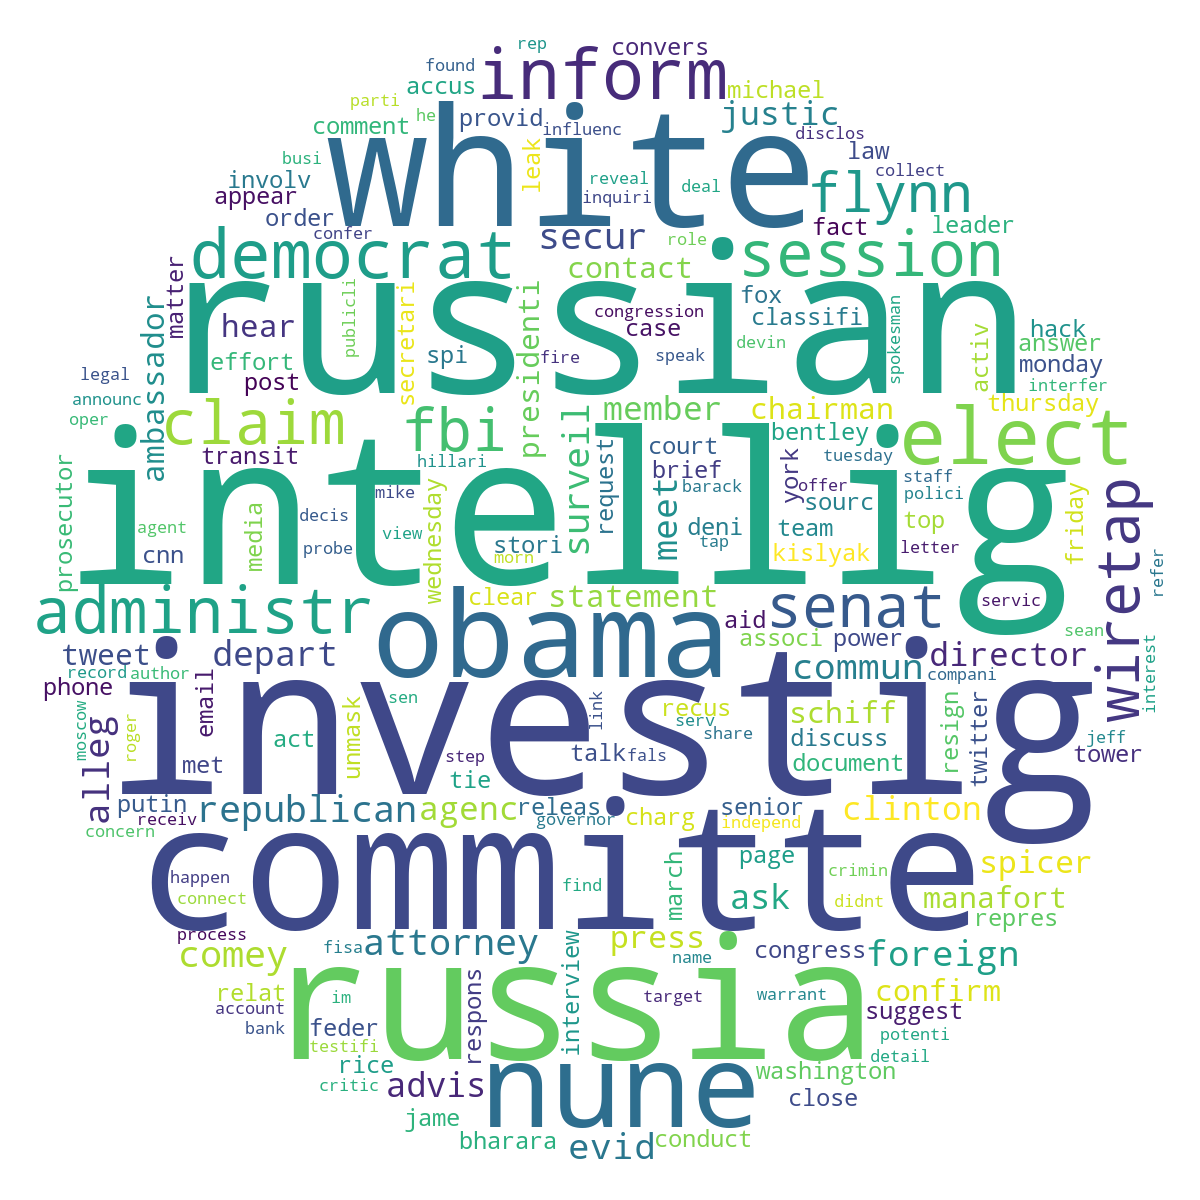

In [20]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 466 # cluster 466
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [32]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 899 (NORTH KOREA MALAYSIA INCIDENT)
# =============================================================================
# Analyze cluster 899 which appears to contain content about a specific North Korea incident.
# Top words include: north, korea, korean, missile, kim, malaysia, etc.
# This cluster focuses on a specific incident involving North Korea and Malaysia,
# possibly related to the assassination of Kim Jong-nam.

# visualize the word distribution of specified cluster:
# for cluster 899 (appears to be North Korea-Malaysia incident related)
specified_cls = particle.clusters[899]
word_distribution = specified_cls.word_distribution
top_num = 100
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

manchest 756.0
attack 577.0
polic 496.0
abedi 312.0
concert 263.0
bomb 236.0
grand 204.0
famili 201.0
terror 188.0
arena 184.0
british 159.0
secur 155.0
monday 147.0
victim 147.0
investig 145.0
night 144.0
friend 141.0
kill 140.0
arrest 139.0
children 138.0
love 135.0
statement 134.0
citi 125.0
tuesday 122.0
ariana 122.0
explos 121.0
terrorist 116.0
britain 115.0
salman 106.0
confirm 101.0
threat 101.0
london 99.0
servic 97.0
libya 95.0
man 94.0
minist 94.0
daughter 91.0
level 89.0
bomber 85.0
uk 83.0
greater 83.0
inform 82.0
event 82.0
respons 82.0
carri 81.0
suicid 80.0
injur 79.0
arm 78.0
twitter 78.0
prime 77.0
intellig 77.0
fan 76.0
post 76.0
media 75.0
home 75.0
place 74.0
young 74.0
brother 74.0
wednesday 73.0
author 72.0
area 70.0
critic 70.0
share 69.0
emerg 68.0
claim 68.0
england 67.0
rais 67.0
islam 66.0
leak 66.0
thought 66.0
hospit 64.0
remain 63.0
cnn 63.0
parent 61.0
blast 61.0
updat 61.0
suspect 61.0
die 61.0
network 59.0
girl 59.0
releas 59.0
singer 58.0
plan 58.0
mot

Done: saved JSON/CSV and circular word cloud for cluster:  899


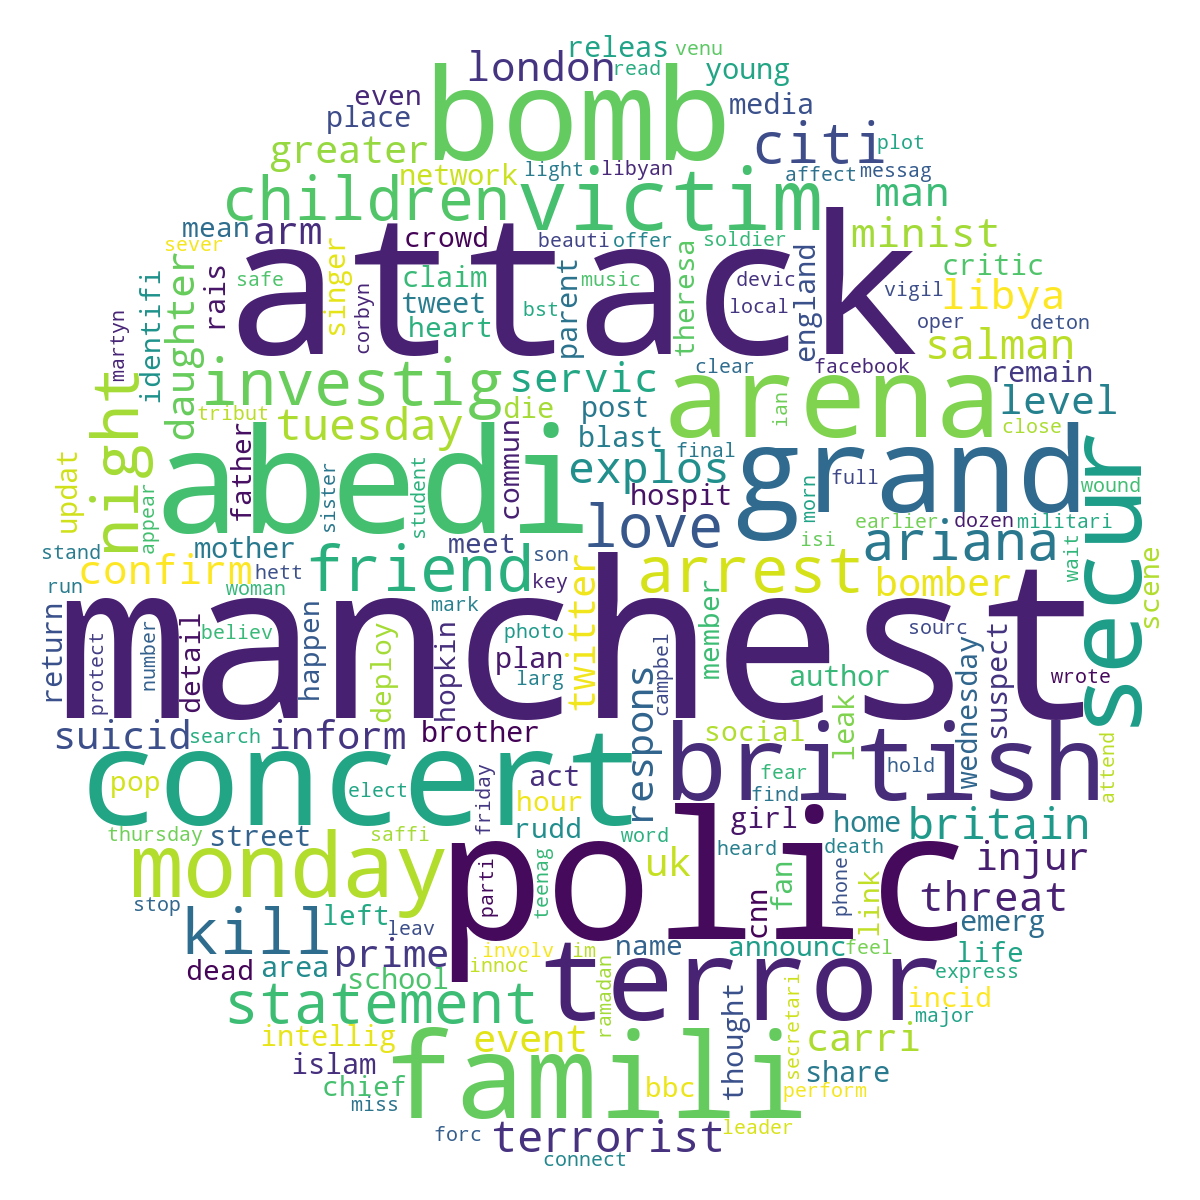

In [21]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 899 # cluster 899
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [34]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 357 (POLITICS)
# =============================================================================
# Analyze the word distribution for cluster 357, which appears to be the largest cluster.
# This cluster seems to contain political news articles based on the top words:
# trump, president, state, people, government, etc.

# visualize the word distribution of specified cluster:
# for cluster 357 (largest cluster - appears to be political news)
specified_cls = particle.clusters[357]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

north 1115.0
kim 835.0
korea 736.0
korean 588.0
jong 391.0
china 361.0
missil 326.0
malaysia 305.0
malaysian 278.0
south 266.0
polic 255.0
nam 236.0
weapon 201.0
kill 183.0
nuclear 173.0
vx 164.0
airport 159.0
lumpur 139.0
kuala 139.0
attack 138.0
intern 138.0
agent 136.0
suspect 133.0
chemic 133.0
leader 132.0
pyongyang 129.0
test 129.0
secur 128.0
assassin 125.0
death 125.0
author 110.0
women 103.0
system 103.0
foreign 99.0
face 97.0
beij 96.0
bodi 94.0
ballist 93.0
militari 92.0
nerv 91.0
investig 90.0
statement 90.0
launch 89.0
murder 87.0
chines 87.0
diplomat 84.0
sanction 83.0
ministri 83.0
arrest 79.0
russian 79.0


Done: saved JSON/CSV and circular word cloud for cluster:  357


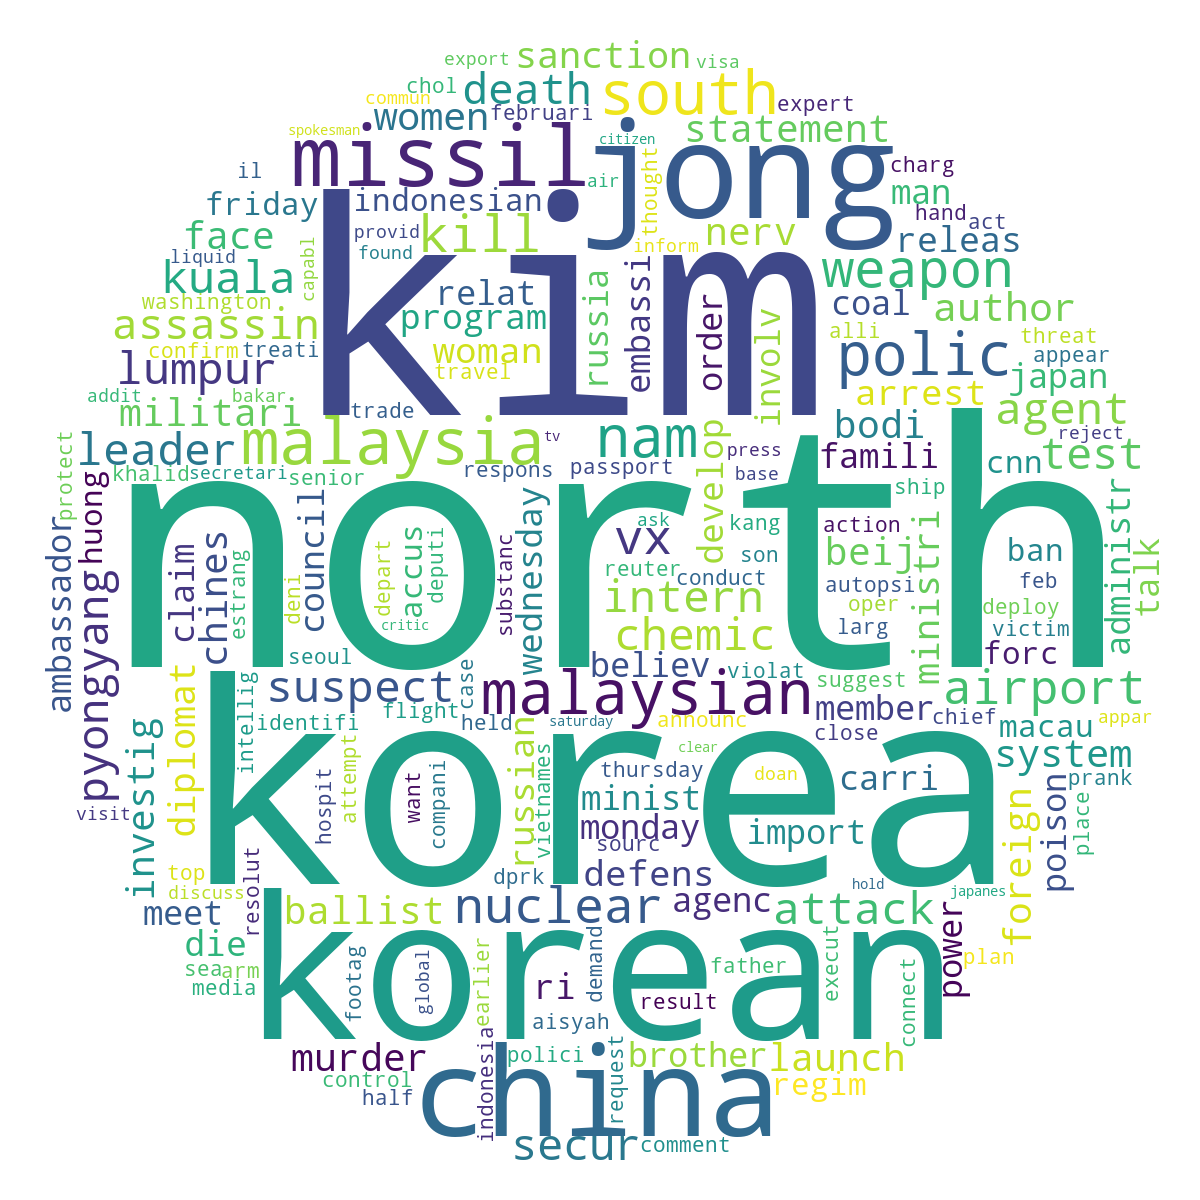

In [22]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 357 # cluster 357
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [36]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 937 (POLITICS)
# =============================================================================
# Analyze the word distribution for cluster 937, which appears to be the largest cluster.
# This cluster seems to contain political news articles based on the top words:
# trump, president, state, people, government, etc.

# visualize the word distribution of specified cluster:
# for cluster 937 (largest cluster - appears to be political news)
specified_cls = particle.clusters[937]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

attack 764.0
london 689.0
polic 608.0
bridg 266.0
terror 194.0
kill 149.0
saturday 127.0
stab 126.0
van 119.0
british 119.0
khan 116.0
man 115.0
market 112.0
manchest 108.0
incid 108.0
sunday 108.0
borough 107.0
arrest 104.0
butt 102.0
june 101.0
injur 98.0
terrorist 97.0
secur 95.0
citi 94.0
statement 94.0
men 91.0
night 90.0
minist 89.0
arm 85.0
britain 84.0
mayor 83.0
tweet 81.0
servic 78.0
love 76.0
dead 75.0
shot 75.0
twitter 73.0
area 72.0
prime 72.0
metropolitan 71.0
islam 71.0
critic 70.0
respond 68.0
restaur 68.0
respons 67.0
concert 67.0
pedestrian 66.0
bark 65.0
confirm 63.0
investig 63.0


Done: saved JSON/CSV and circular word cloud for cluster:  937


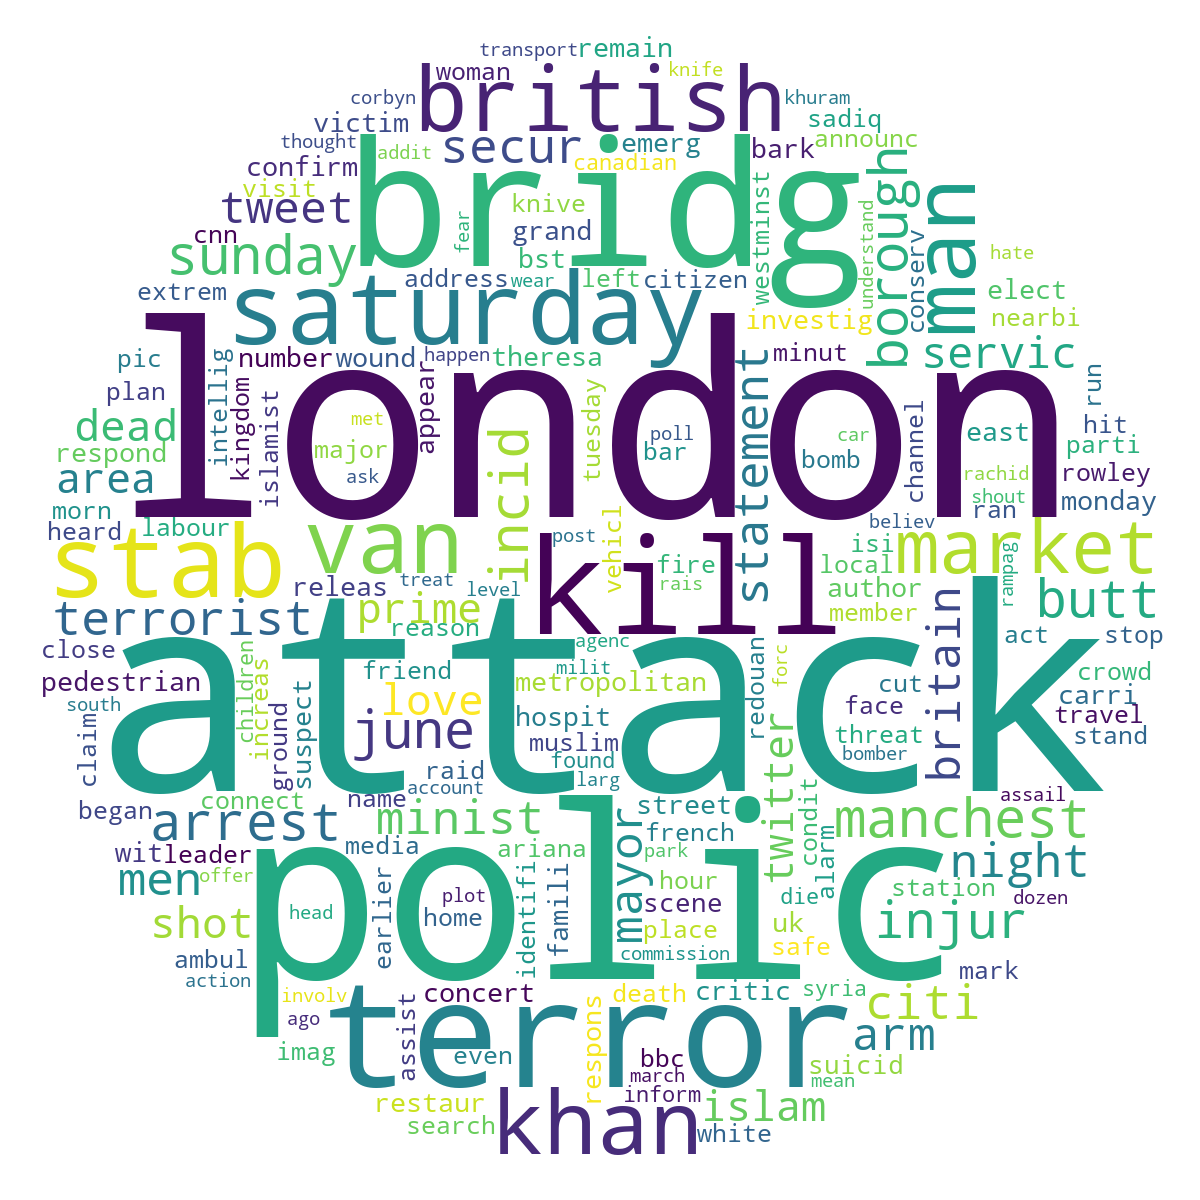

In [23]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 937 # cluster 937
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [38]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 435 (POLITICS)
# =============================================================================
# Analyze the word distribution for cluster 435, which appears to be the largest cluster.
# This cluster seems to contain political news articles based on the top words:
# trump, president, state, people, government, etc.

# visualize the word distribution of specified cluster:
# for cluster 435 (largest cluster - appears to be political news)
specified_cls = particle.clusters[435]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

la 573.0
oscar 375.0
land 285.0
award 274.0
moonlight 247.0
film 230.0
winner 200.0
pictur 194.0
win 188.0
academi 171.0
won 141.0
envelop 130.0
night 127.0
beatti 107.0
kimmel 106.0
categori 94.0
present 94.0
actor 92.0
dunaway 87.0
hollywood 86.0
director 85.0
actress 83.0
movi 82.0
stage 80.0
produc 78.0
nomin 73.0
announc 69.0
pwc 69.0
star 68.0
hand 66.0
cullinan 66.0
sunday 64.0
affleck 64.0
speech 62.0
origin 62.0
moment 62.0
wrong 60.0
stone 60.0
happen 59.0
read 58.0
ceremoni 58.0
stori 56.0
manchest 56.0
jenkin 55.0
warren 54.0
sea 53.0
account 50.0
fay 49.0
twitter 48.0
screenplay 48.0


Done: saved JSON/CSV and circular word cloud for cluster:  435


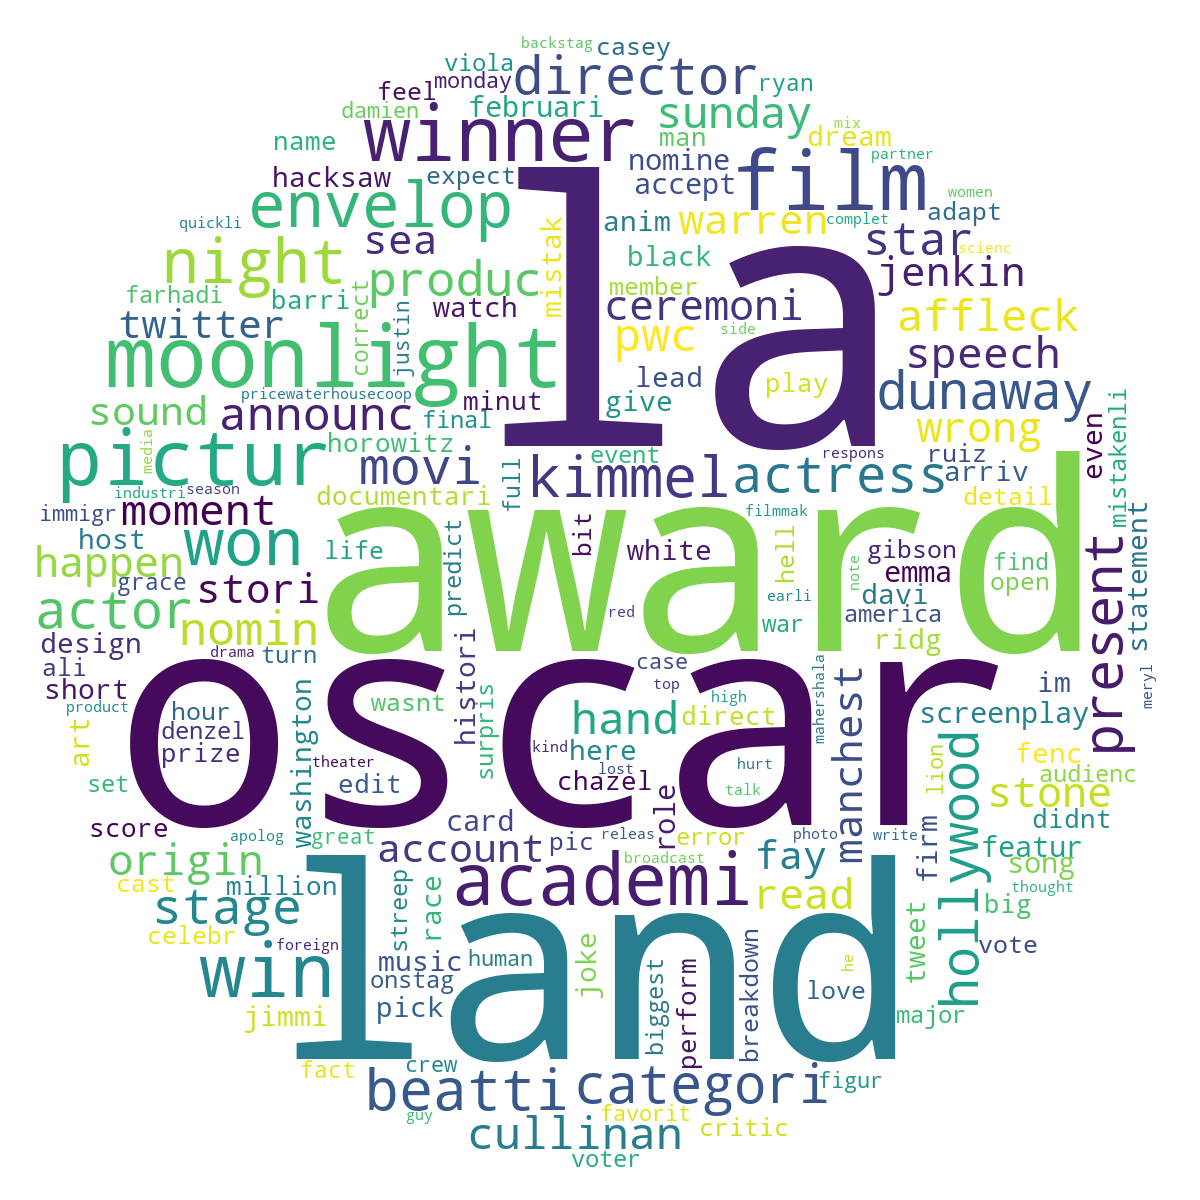

In [24]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 435 # cluster 435
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [40]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 922 (POLITICS)
# =============================================================================
# Analyze the word distribution for cluster 922, which appears to be the largest cluster.
# This cluster seems to contain political news articles based on the top words:
# trump, president, state, people, government, etc.

# visualize the word distribution of specified cluster:
# for cluster 922 (largest cluster - appears to be political news)
specified_cls = particle.clusters[922]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

griffin 382.0
photo 150.0
kathi 146.0
maher 141.0
comedian 95.0
twitter 84.0
imag 83.0
cnn 82.0
tuesday 72.0
head 72.0
apolog 64.0
im 62.0
statement 59.0
photograph 57.0
sass 53.0
video 53.0
night 51.0
bill 50.0
hold 50.0
comment 49.0
shield 48.0
tweet 46.0
joke 44.0
eve 42.0
friday 42.0
bloodi 41.0
wrong 40.0
barron 40.0
shoot 38.0
june 38.0
blood 36.0
sever 36.0
son 36.0
morn 36.0
wednesday 36.0
media 34.0
word 33.0
line 33.0
controversi 31.0
fire 31.0
disgust 30.0
come 30.0
cooper 29.0
children 29.0
pose 29.0
cross 28.0
social 28.0
servic 28.0
post 27.0
tyler 27.0


Done: saved JSON/CSV and circular word cloud for cluster:  922


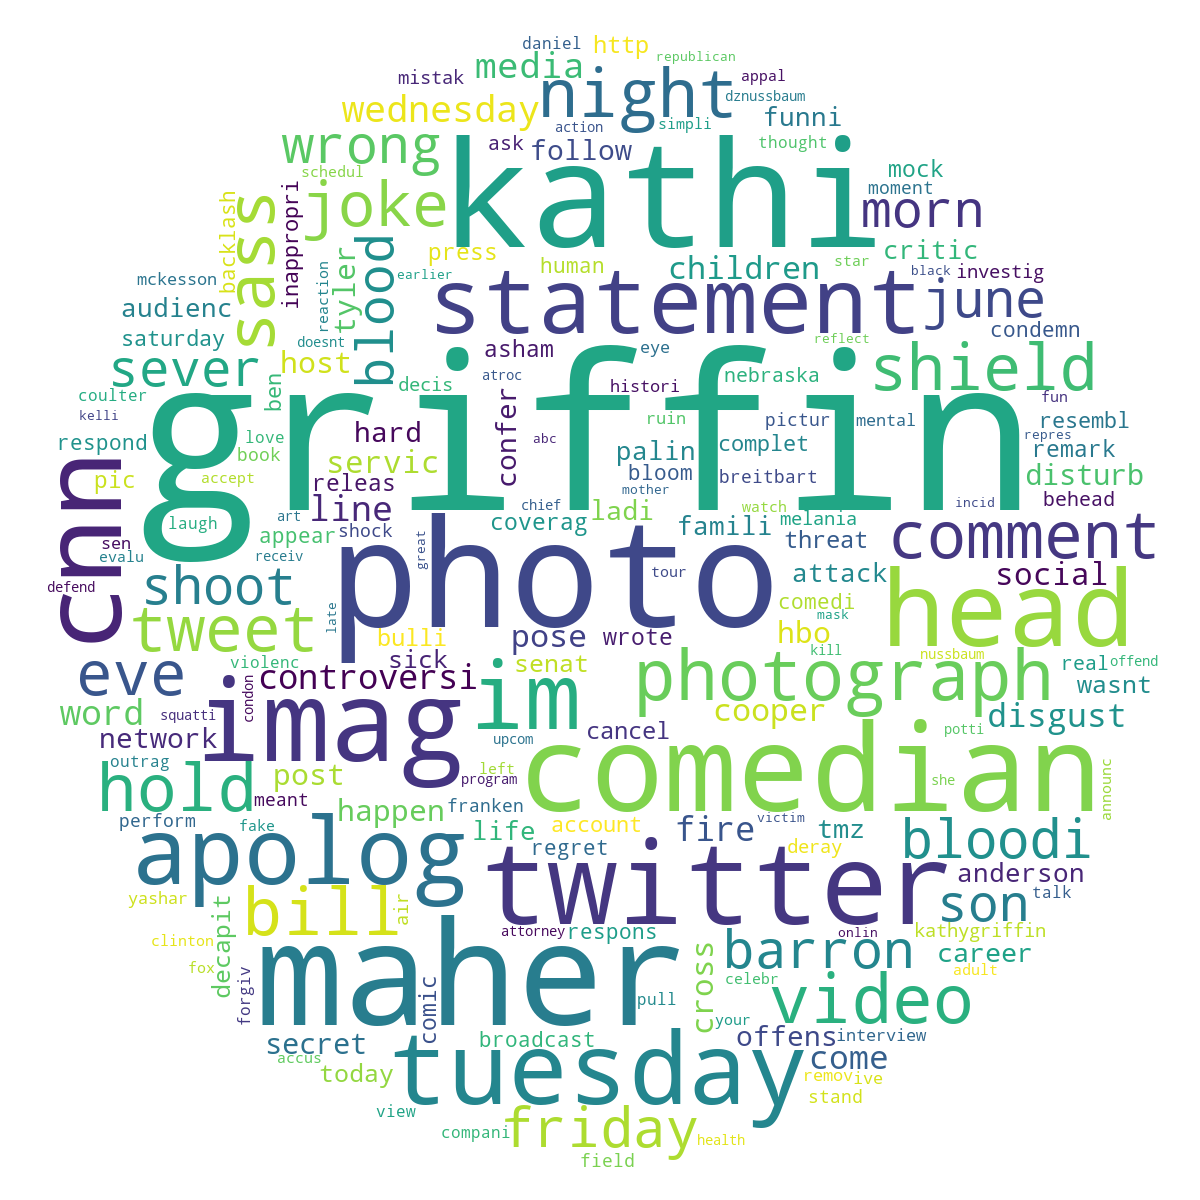

In [25]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 922 # cluster 922
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [42]:
# =============================================================================
# WORD DISTRIBUTION ANALYSIS - CLUSTER 194 (POLITICS)
# =============================================================================
# Analyze the word distribution for cluster 194, which appears to be the largest cluster.
# This cluster seems to contain political news articles based on the top words:
# trump, president, state, people, government, etc.

# visualize the word distribution of specified cluster:
# for cluster 194 (largest cluster - appears to be political news)
specified_cls = particle.clusters[194]
word_distribution = specified_cls.word_distribution
top_num = 50
top_word_idx = np.argsort(word_distribution)[::-1][:top_num]
for word_id in top_word_idx:
    print(id2word[str(word_id)], word_distribution[word_id])

spicer 330.0
inaugur 277.0
press 222.0
crowd 220.0
media 170.0
white 135.0
fact 120.0
claim 110.0
size 107.0
secretari 97.0
saturday 96.0
obama 93.0
million 89.0
washington 78.0
sean 68.0
conway 67.0
estim 67.0
fals 63.0
lie 60.0
administr 59.0
cia 58.0
friday 57.0
mall 57.0
statement 57.0
brief 56.0
januari 53.0
audienc 53.0
tweet 52.0
miller 52.0
bust 50.0
number 47.0
altern 46.0
photograph 45.0
twitter 44.0
largest 41.0
sunday 40.0
oval 40.0
servic 39.0
todd 39.0
post 37.0
falsehood 36.0
march 35.0
apolog 35.0
period 33.0
rate 32.0
wit 32.0
monday 31.0
photo 31.0
women 30.0
cover 30.0


Done: saved JSON/CSV and circular word cloud for cluster:  194


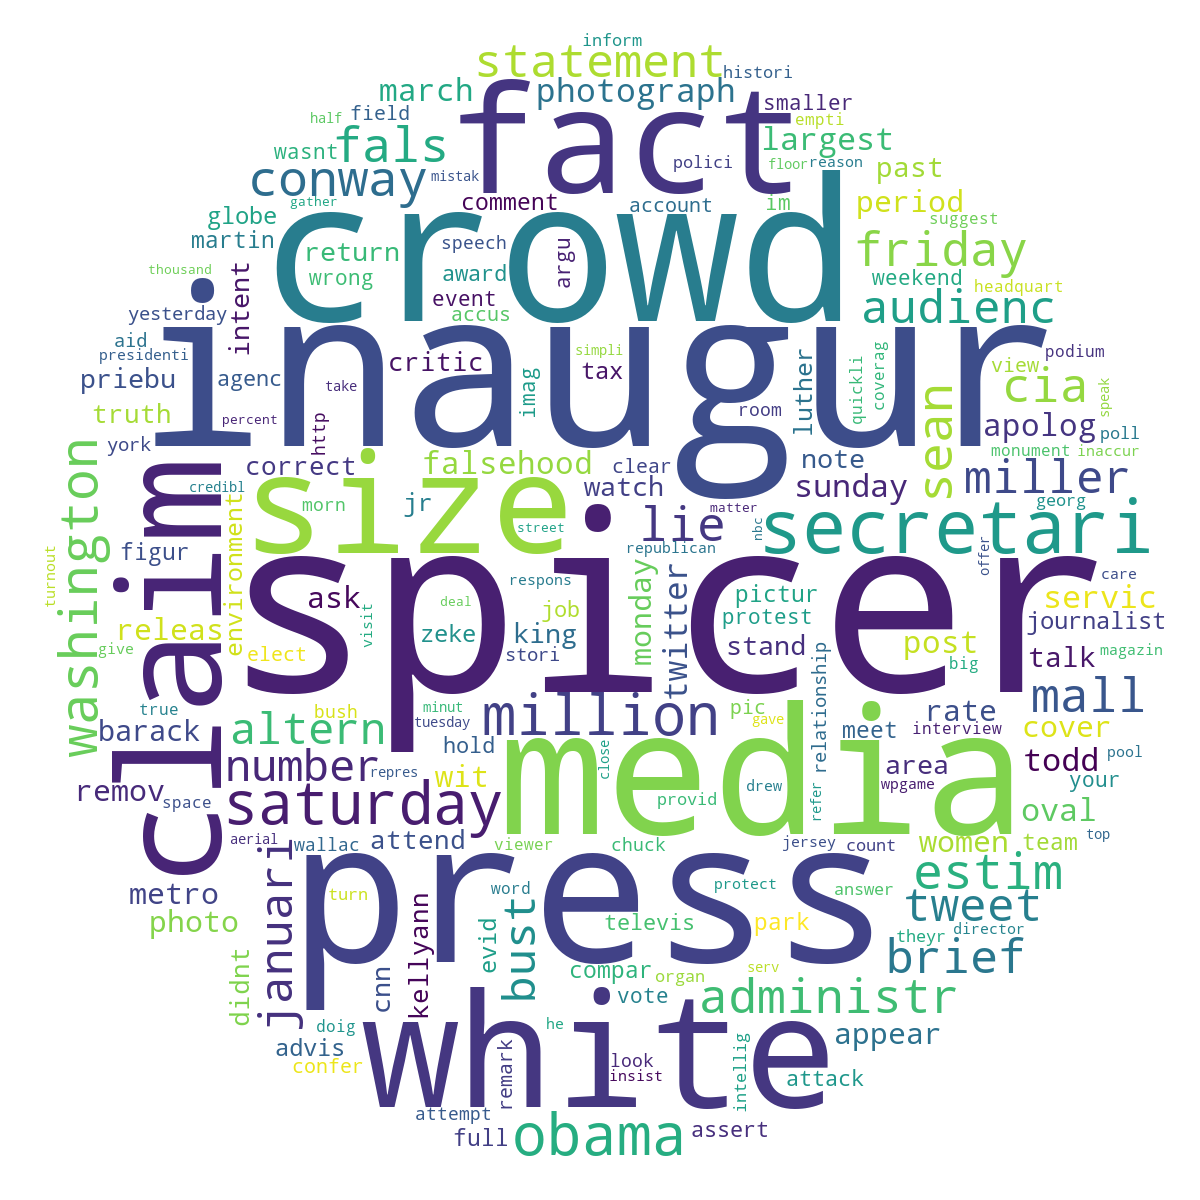

In [26]:
# 1) Instantiate
analyzer = ClusterWordAnalyzer(particle=particle, id2word=id2word)

# 2) Frequencies (top 200 by default behavior we set) and save
cluster_idx = 194 # cluster 194
freqs = analyzer.get_word_freq(cluster_idx=cluster_idx)
analyzer.save_word_freq(
    freqs,
    out_json=f"results/cluster_{cluster_idx}_wordfreq.json",
    out_csv=f"results/cluster_{cluster_idx}_wordfreq.csv"
)

# 3) Circular word cloud and save
analyzer.make_wordcloud(
    cluster_idx=cluster_idx,
    out_path=f"results/cluster_{cluster_idx}_wordcloud_circular.png"
)

print("Done: saved JSON/CSV and circular word cloud for cluster: ", cluster_idx)


# 4) Display the saved word cloud inline
from IPython.display import Image, display
display(Image(filename=f"results/cluster_{cluster_idx}_wordcloud_circular.png"))

In [1]:
import numpy as np
import pickle
from SMC_sampling import parse_newsitem_2_doc
from utils import log_dirichlet_multinomial_distribution

def compute_perplexity(particle, test_items, vocabulary_size, theta0):
    total_words = 0
    log_liks = []
    for news_item in test_items:
        doc = parse_newsitem_2_doc(news_item, vocabulary_size)
        scores = []
        for _, cluster in particle.clusters.items():
            # aggregate (cluster + doc) just like training code does
            cls_word_dist = cluster.word_distribution + doc.word_distribution
            cls_word_count = cluster.word_count + doc.word_count
            ll = log_dirichlet_multinomial_distribution(
                cls_word_dist, doc.word_distribution,
                cls_word_count, doc.word_count,
                vocabulary_size, theta0
            )
            scores.append(ll)
        log_liks.append(max(scores))
        total_words += doc.word_count
    avg_log_per_word = sum(log_liks) / total_words
    perplexity = float(np.exp(-avg_log_per_word))
    return perplexity, avg_log_per_word

# Example: load trained particles and evaluate
with open('/Users/banosk/Desktop/Pitman-Yor-Hawkes-Process copy/results/particles.pkl','rb') as f:
    particles = pickle.load(f)

best_particle = max(particles, key=lambda p: p.weight)

vocabulary_size = 56720            # use the same as training
theta0 = np.array([0.01] * vocabulary_size)  # same prior as training

# test_items must be tuples: (doc_id, unix_timestamp, (word_id, count), total_word_count)
test_items = [
    (123, 1700000000, (789, 3), 100),
    # ... add your test docs here ...
]

ppx, avg_llpw = compute_perplexity(best_particle, test_items, vocabulary_size, theta0)
print('perplexity:', ppx, 'avg log-lik per word:', avg_llpw)

perplexity: 694.6256724921775 avg log-lik per word: -6.543373099736637
